In [27]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from scipy.stats import uniform
from scipy.stats import gaussian_kde

In [28]:
def f(x):
    if x > math.pi/2 and x <= math.pi:
        return 4/math.pi - 4*x/math.pi**2
    elif x >= 0 and x <= math.pi/2:
        return 4*x/math.pi**2
    else:
        return 0

def g(x):
    if x>=0 and x<= math.pi:
        return math.sin(x)/2

In [34]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(lambda x: -(f(x)/g(x)), bounds=(0, math.pi/2), method='bounded')
supremum = -res.fun

res_1 = minimize_scalar(lambda x: -(f(x)/g(x)), bounds=(math.pi/2, math.pi), method='bounded')
supremum_1 = -res.fun

In [30]:
iteration = 0
samples = np.zeros(shape=(10000, ))

while iteration < 10000:
    # Step 1: Generate a Y from g
    x = random.uniform(0, 1)
    y = 2*np.arcsin(x)

    # Step 2: Generate u from U(0, 1) and transform to (0, pi)
    u = random.uniform(0, 1)*math.pi

    # Step 3: Check the interval and reject if necessary
    if u>=0 and u<= math.pi/2:
        if u < (8*x)/(np.sin(x)*supremum*math.pi**2):
            samples[iteration] = u
            iteration += 1
        else:
            continue
    elif u>= math.pi/2 and u<= math.pi:
        if u < (8*math.pi - 8*x)/(np.sin(x)*supremum*math.pi**2):
            samples[iteration] = u
            iteration += 1
        else:
            continue
    else:
        print("WRONG")



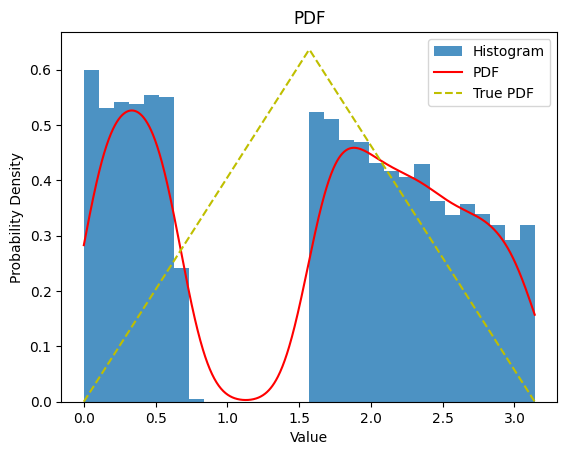

In [31]:
# Plot the histogram
plt.hist(samples, bins=30, density=True, alpha=0.8, label='Histogram')

# Estimate the PDF curve using KDE
kde = gaussian_kde(samples)
z = np.linspace(samples.min(), samples.max(), 1000)
estimated_pdf = kde(z)
plt.plot(z, estimated_pdf, 'r-', label='PDF')

# Plot the true PDF curve
real_pdf = [f(xi) for xi in z]
plt.plot(z, real_pdf, 'y--', label='True PDF')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF')
plt.legend()

# Show the plot
plt.show()

In [32]:
def f_array(x):
    return np.array([f(xi) for xi in x])

# Compute the Kolmogorov-Smirnov test statistic and p-value
statistic, pvalue = kstest(samples, f_array)
print('K-S test statistic:', statistic)
print('p-value:', pvalue)

K-S test statistic: 0.9999570159410711
p-value: 0.0
